In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns

In [3]:
# d0 = pd.read_csv('sdBShortP_large_Jdot_3_alpha_0.1_ce_applied.csv')
# d1 = pd.read_csv('sdBShortP_large_Jdot_3_alpha_0.5_ce_applied.csv')
# d2 = pd.read_csv('sdBShortP_large_Jdot_3_alpha_0.9_ce_applied.csv')
# d3 = pd.read_csv('sdBShortP_large_Jdot_3_alpha_1.5_ce_applied.csv')

d0 = pd.read_csv('sdBShortP_large_Jdot_30_alpha_0.1_ce_applied.csv')
d1 = pd.read_csv('sdBShortP_large_Jdot_30_alpha_0.5_ce_applied.csv')
d2 = pd.read_csv('sdBShortP_large_Jdot_30_alpha_0.9_ce_applied.csv')
d3 = pd.read_csv('sdBShortP_large_Jdot_30_alpha_1.5_ce_applied.csv')

label0 = 'alpha = 0.1'
label1 = 'alpha = 0.5'
label2 = 'alpha = 0.9'
label3 = 'alpha = 1.5'

In [4]:
gaia = pd.read_csv('1Kpc_Hiparchos_sample_cut.csv', sep='\s+')

Mg = np.linspace(0, 6, 100)
bprp = np.zeros_like(Mg)
s = np.where(Mg <= 1)
bprp[s] = (Mg[s] - 2.53) / 11.76
s = np.where((Mg > 1) & (Mg <= 3.8))
bprp[s] = (Mg[s] - 1.84) / 5.6
s = np.where(Mg > 3.8)
bprp[s] = (Mg[s] + 1.8) / 16
gaia_cut = pd.DataFrame(data={'bp_rp': bprp, 'M_g': Mg})

In [17]:
#d0.info(verbose=True)

In [6]:
sel_types = ['sdB']
dsdb0 = d0[d0['product'].isin(sel_types)]
dsdb1 = d1[d1['product'].isin(sel_types)]
dsdb2 = d2[d2['product'].isin(sel_types)]
dsdb3 = d3[d3['product'].isin(sel_types)]

In [7]:
bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
labels = ['0.1', '0.3', '0.5', '0.7', '0.9', '1.1']

dsdb0['M2_final_bin'] = pd.cut(dsdb0['M2_final'], bins=bins, labels=labels)
dsdb1['M2_final_bin'] = pd.cut(dsdb1['M2_final'], bins=bins, labels=labels)
dsdb2['M2_final_bin'] = pd.cut(dsdb2['M2_final'], bins=bins, labels=labels)
dsdb3['M2_final_bin'] = pd.cut(dsdb3['M2_final'], bins=bins, labels=labels)

In [8]:
print(label0)
print(d0[(d0['stability'] == 'CE')]['product'].value_counts(sort=False))

print(label1)
print(d1[(d1['stability'] == 'CE')]['product'].value_counts(sort=False))

print(label2)
print(d2[(d2['stability'] == 'CE')]['product'].value_counts(sort=False))

print(label3)
print(d3[(d3['stability'] == 'CE')]['product'].value_counts(sort=False))

alpha = 0.1
sdB      14
He-WD    48
HB        1
Name: product, dtype: int64
alpha = 0.5
sdB       270
HB          2
He-WD    1674
Name: product, dtype: int64
alpha = 0.9
sdB       275
HB         13
He-WD    2716
Name: product, dtype: int64
alpha = 1.5
sdB       293
HB        142
He-WD    3515
Name: product, dtype: int64


In [9]:
def make_plot(plotting_function, label=False, title=""):

    fig = pl.figure(1, figsize=(10, 10))
    if title != "":
        fig.suptitle(title, fontsize=20)

    pl.subplot(221)
    plotting_function(dsdb0)
    if label:
        pl.legend()
    pl.title(label0)

    pl.subplot(222)
    plotting_function(dsdb1)
    pl.title(label1)

    pl.subplot(223)
    plotting_function(dsdb2)
    pl.title(label2)

    pl.subplot(224)
    plotting_function(dsdb3)
    pl.title(label3)

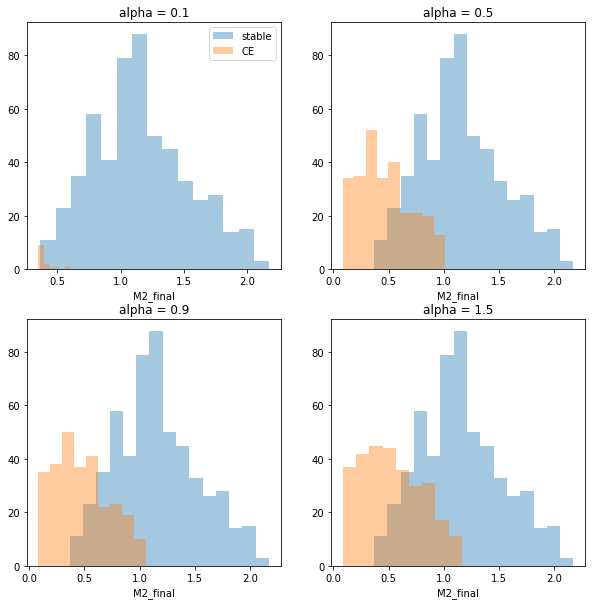

In [10]:
def plot_dist(df):
    sns.distplot(df[df['stability'] == 'stable']['M2_final'], kde=False, label='stable')
    sns.distplot(df[df['stability'] == 'CE']['M2_final'], kde=False, label='CE')

make_plot(plot_dist, label=True)

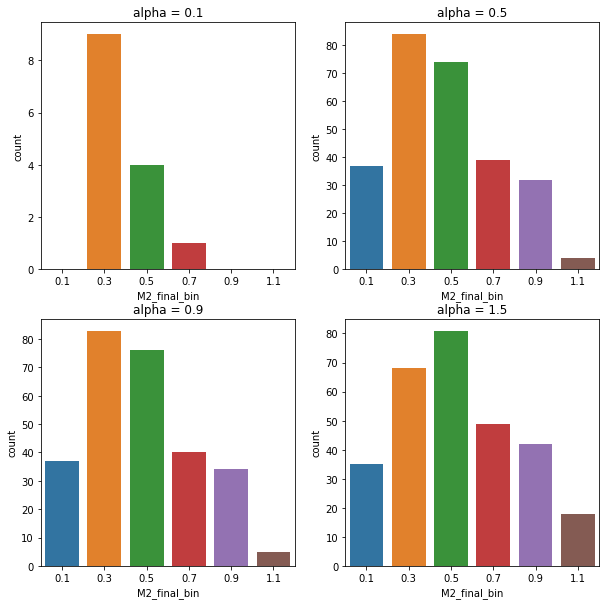

In [11]:
def plot_dist(df):
    sns.countplot('M2_final_bin', data=df[df['stability'] == 'CE'])

make_plot(plot_dist)

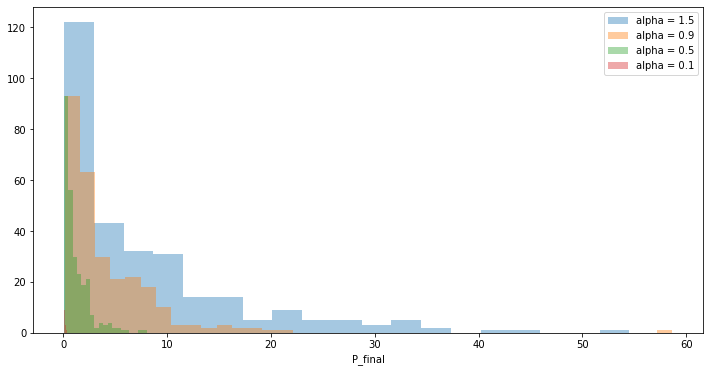

In [12]:
def plot_dist(df, **kwargs):
    sns.distplot(df[(df['stability'] == 'CE')]['P_final'], kde=False, **kwargs)

pl.figure(1, figsize=(12, 6))
plot_dist(dsdb3, label=label3)
plot_dist(dsdb2, label=label2)
plot_dist(dsdb1, label=label1)
plot_dist(dsdb0, label=label0)
pl.legend()


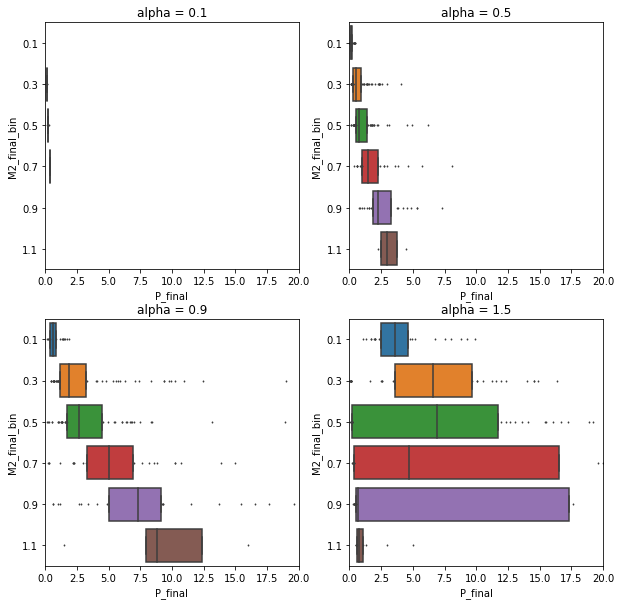

In [13]:
def plot_dist(df):
    sns.boxplot('P_final', 'M2_final_bin', data=df[df['stability'] == 'CE'], fliersize=1, whis=0)
    pl.xlim([0, 20])

make_plot(plot_dist, title="Final Period")

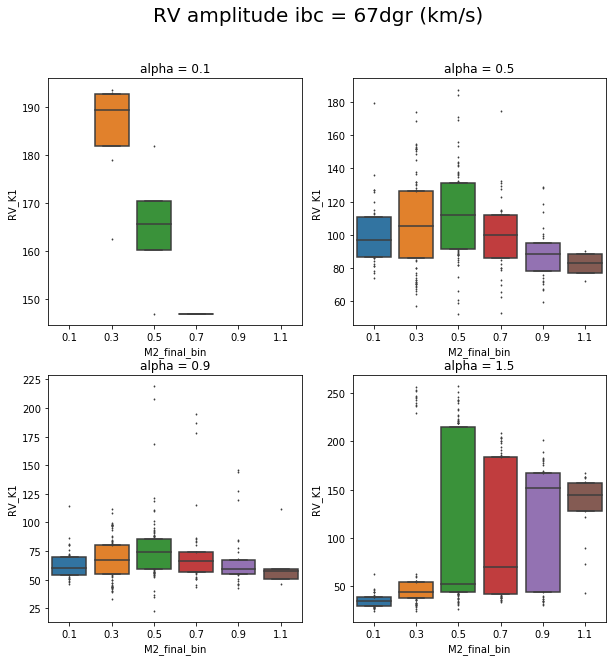

In [14]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'RV_K1', data=df[df['stability'] == 'CE'], fliersize=1, whis=0)
#     pl.ylim([10000, 33000])

make_plot(plot_dist, title="RV amplitude ibc = 67dgr (km/s)")

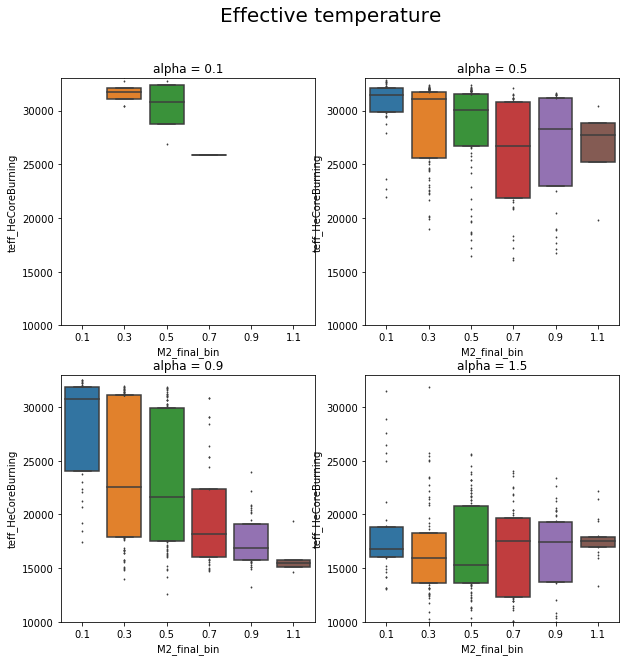

In [15]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'teff_HeCoreBurning', data=df[df['stability'] == 'CE'], fliersize=1, whis=0)
    pl.ylim([10000, 33000])

make_plot(plot_dist, title="Effective temperature")

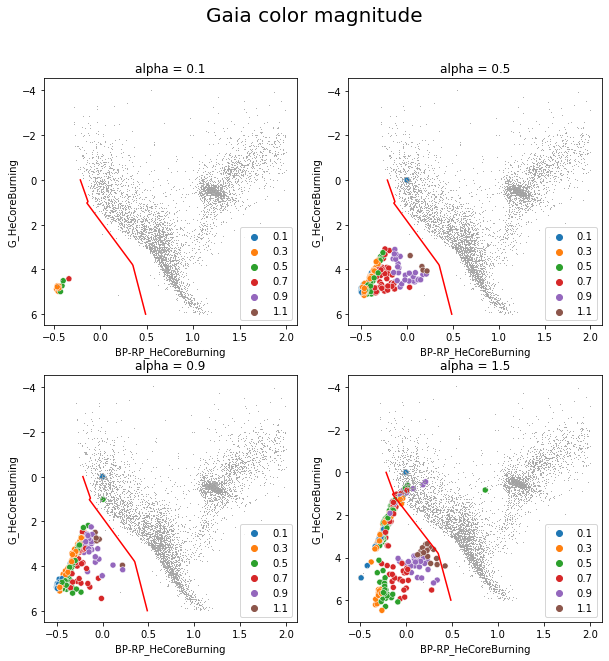

In [16]:
def plot_gaia(df):
    sns.scatterplot('BP-RP_HeCoreBurning', 'G_HeCoreBurning', data=df[df['stability'] == 'CE'], hue='M2_final_bin')
    sns.scatterplot('bp_rp', 'M_g', data=gaia, color='gray', s=1)
    
    pl.plot(gaia_cut['bp_rp'], gaia_cut['M_g'], '-r')
    
    pl.gca().invert_yaxis()
    
make_plot(plot_gaia, title="Gaia color magnitude")